In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

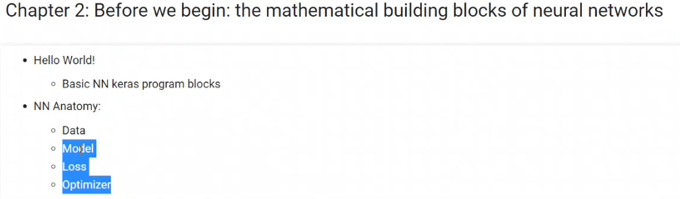

## Four ingreadints for superviesed learning network

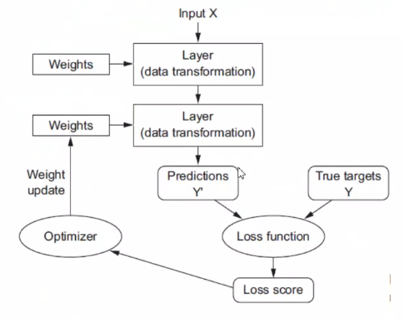

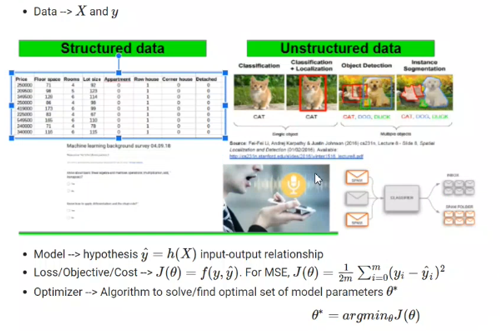

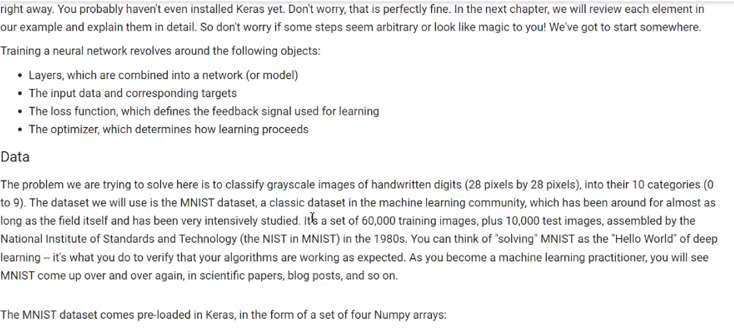

In [1]:
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(train_imgs , train_labels) , (test_imgs , test_labels) = mnist.load_data()

2024-02-05 14:45:53.139106: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 14:45:53.139191: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 14:45:53.140936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train ,y_val = train_test_split(train_imgs , train_labels , test_size = 0.2, shuffle= True)

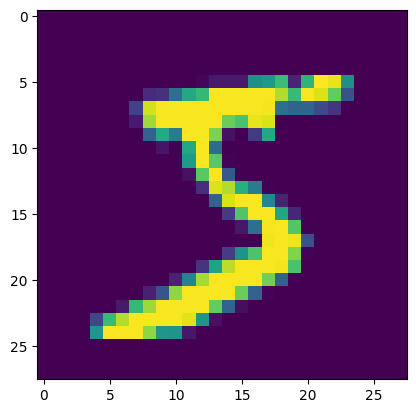

In [4]:
import matplotlib.pyplot as plt 
img = train_imgs[0]
plt.imshow(img);

In [5]:
train_labels[0]

5

In [6]:
img.shape

(28, 28)

In [7]:
train_imgs.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
# from 0 to 9 as unique values
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_imgs.shape

(10000, 28, 28)

In [11]:
test_labels.shape

(10000,)

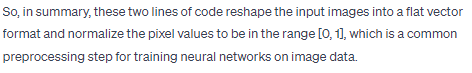

In [12]:
# instead of of using matrix we convert the matrix into column vector
train_imgs = train_imgs.reshape((60000 , 28 * 28))
train_imgs = train_imgs.astype('float32') / 255


test_imgs = test_imgs.reshape((10000 , 28 * 28))
test_imgs = test_imgs.astype('float32') / 255


In [13]:
train_imgs.shape

(60000, 784)

### We also nedd to categorically encode the lables, a step which we ecplain in chapter 3 

In [14]:
train_labels.dtype

dtype('uint8')

In [15]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)
print(train_labels[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
train_labels.dtype

dtype('float32')

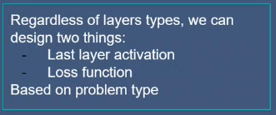

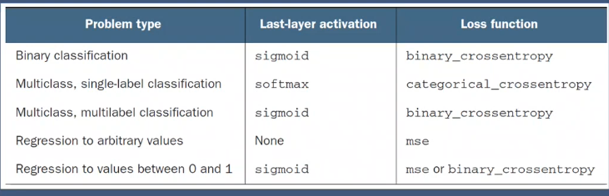

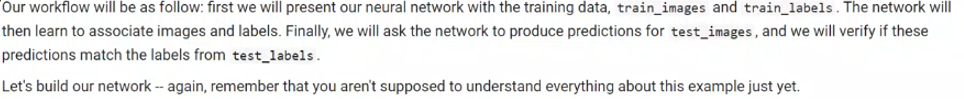

### Model

#### let's try with only one Layer

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [18]:
network = models.Sequential()
network.add(layers.Dense(10 , activation = 'softmax' , input_shape= (28*28 ,)) )

In [19]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 7850 = 784 * 10 + 10:

    - 784 number of inputs for each img
    - 10 classes each class have 784 wieght
    - 10 biases 1 bias for each class

- Trainable params: 7850 : the `Weights` that i can adjust to minimize the loss
- Non-trainable params: `the specified wieght` that i cann't adjust 

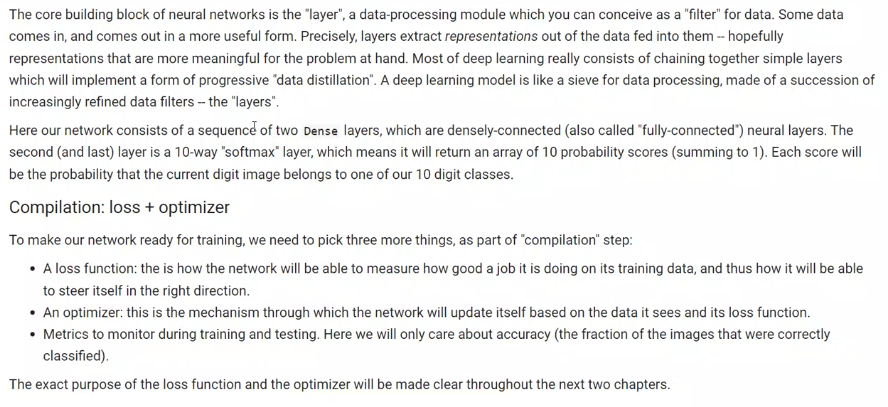

**the `compile` method is used to configure the model for training. It prepares the neural network for the training process by specifying the optimizer, loss function, and evaluation metrics**

In [20]:
network.compile(optimizer='rmsprop',
               loss= 'categorical_crossentropy',
               metrics = ['accuracy'])

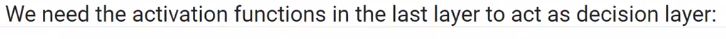

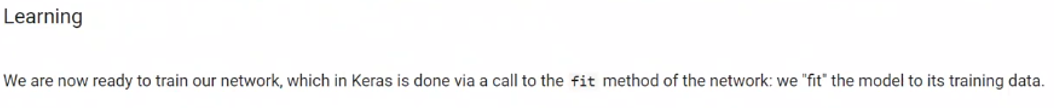

In [21]:
network.fit(train_imgs , train_labels ,batch_size= 128 ,epochs = 5)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6065 - accuracy: 0.8465
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.9071
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.9150
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2908 - accuracy: 0.9187
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2828 - accuracy: 0.9217


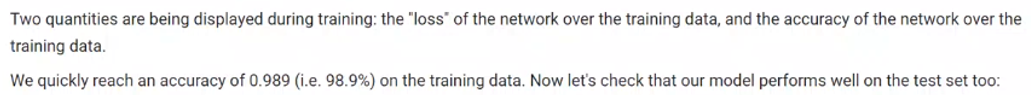

In [22]:
test_loss , test_acc = network.evaluate(test_imgs , test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2785 - accuracy: 0.9236


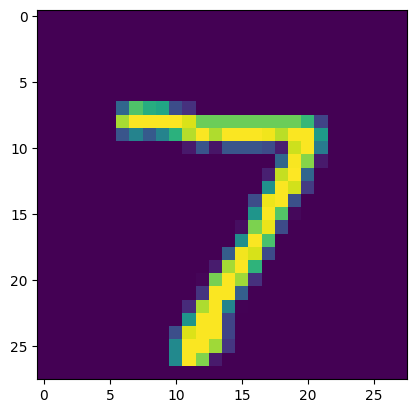

In [23]:
img = test_imgs[0]
plt.imshow(np.reshape(img,(28,28)));

In [24]:
img.shape

(784,)

- the shape is `784` is i insert the img with this shape the predict function will assume that you enter 784 imgs, so we reshape the img to (1,784) and this means 1 img with 784 pixles

In [25]:
# the output for me is the probablties for each unique label
network.predict(np.reshape(img,(1,784)))

1/1 [==============================] - 0s 100ms/step


array([[2.7245074e-05, 4.9368271e-10, 2.9035718e-05, 3.0663239e-03,
        1.3384507e-06, 1.7933873e-05, 5.6692864e-09, 9.9621958e-01,
        2.8703680e-05, 6.0990523e-04]], dtype=float32)

In [26]:
np.argmax(network.predict(np.reshape(img,(1,784))))

1/1 [==============================] - 0s 23ms/step


7

In [27]:
print(f"Test Accuracy {test_acc}")

Test Accuracy 0.9236000180244446


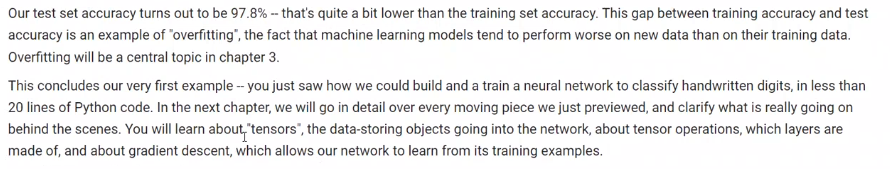

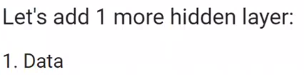

In [34]:
(train_imgs2 , train_labels2) , (test_imgs2 , test_labels2) = mnist.load_data()


train_imgs2 = train_imgs2.reshape((60000 , 28 * 28))
train_imgs2 = train_imgs2.astype('float32') / 255


test_imgs2 = test_imgs2.reshape((10000 , 28 * 28))
test_imgs2 = test_imgs2.astype('float32') / 255


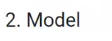

In [35]:
network = models.Sequential()
network.add(layers.Dense(512 , activation = 'relu', input_shape= (28*28 ,)))
network.add(layers.Dense(10 , activation = 'softmax') )

- we identifiy the input_shape only in the first layer
- 512: number of neurons (output neurons)
- 28*28 : (input neurons)
- feature extraction part network.add(layers.Dense(512 , activation = 'relu', input_shape= (28*28 ,)))
- descision part : network.add(layers.Dense(10 , activation = 'softmax') )

In [36]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 401920  = (28 * 28 + 1) * 512 
- 5130 = (512 + 1) * 10 

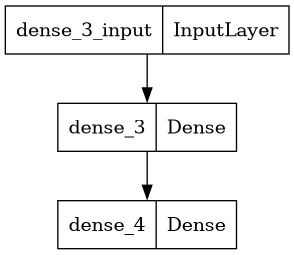

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(network)

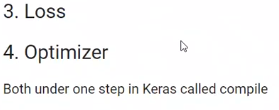

In [45]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


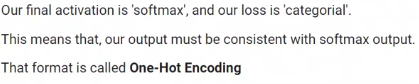

In [39]:
from tensorflow.keras.utils import to_categorical

train_labels2 = to_categorical(train_labels2)
test_labels2 = to_categorical(test_labels2)
print(train_labels2.shape)
print(train_labels2[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [46]:
network.fit(train_imgs2 , train_labels2, batch_size = 128 ,epochs = 5 )

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2541 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1052 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0692 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0495 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0365 - accuracy: 0.9891


In [47]:
test_loss , test_acc = network.evaluate(test_imgs2 , test_labels2)

313/313 [==============================] - 1s 4ms/step - loss: 0.0691 - accuracy: 0.9788


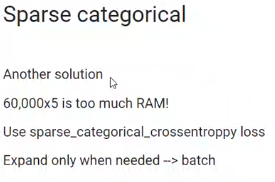

**Sparse_Categorical_crossentropy : how the data exists in my RAM**
   
    - we don't need to make to_categorical
    - we evaluate the loss batch by batch so we don't store the entire 60000 imgs
    - so we store just 128 img (batch_size)
    - this approach save my memory

In [48]:
(train_imgs3 , train_labels3) , (test_imgs3 , test_labels3) = mnist.load_data()


train_imgs3 = train_imgs3.reshape((60000 , 28 * 28))
train_imgs3 = train_imgs3.astype('float32') / 255


test_imgs2 = test_imgs3.reshape((10000 , 28 * 28))
test_imgs3 = test_imgs3.astype('float32') / 255


network = models.Sequential()
network.add(layers.Dense(512 , activation = 'relu', input_shape= (28*28 ,)))
network.add(layers.Dense(10 , activation = 'softmax') )

network.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

network.fit(train_imgs3 , train_labels3 , batch_size = 128 , epochs = 5)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2614 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1086 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0720 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0532 - accuracy: 0.9841
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0397 - accuracy: 0.9882


## Adding More Layers didn't add any additionl performance

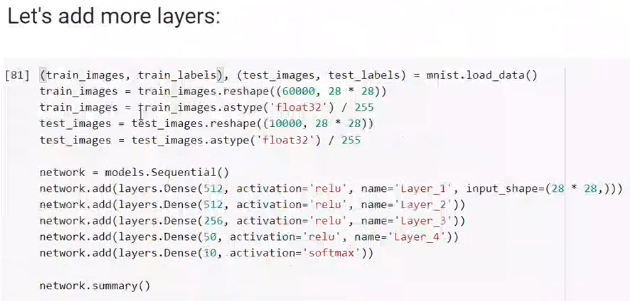

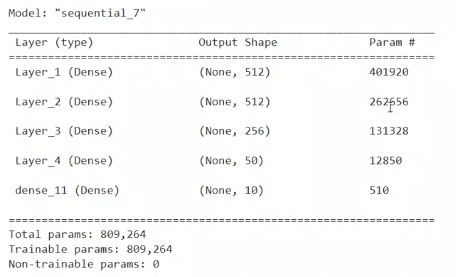

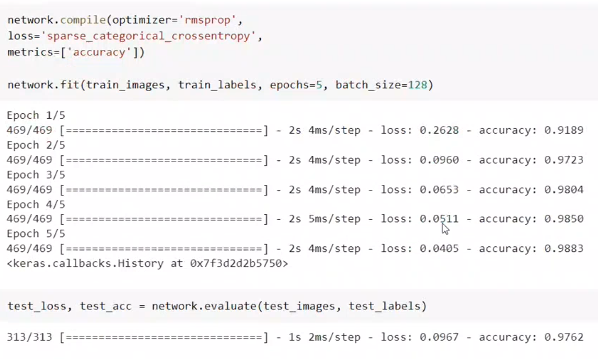